<a href="https://colab.research.google.com/github/akshaypat444/tensorflow_practice/blob/main/02_Neural_Networks_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

1. Docstring Shortcut - Shift + Cmd + Space

## Input Shape for Images Classification

1. Batch Size (32 is very common batch size)
2. Width
3. Height
4. Color Channels

## Activation function

1. For binary classification - Sigmoid
2. For multiclass classfication - SoftMax
3. Usually in dense layers - ReLU

## Loss Function

1. Binary CrossEntropy
2. Multiclass CrossEntropy

## Create Data for Binary classification 1/0

In [2]:
## Create 1000 examples
n_samples = 1000


# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)


In [3]:
circles = pd.DataFrame({"X0": X[:, 0], "X1":X[:, 1], "label": y })
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


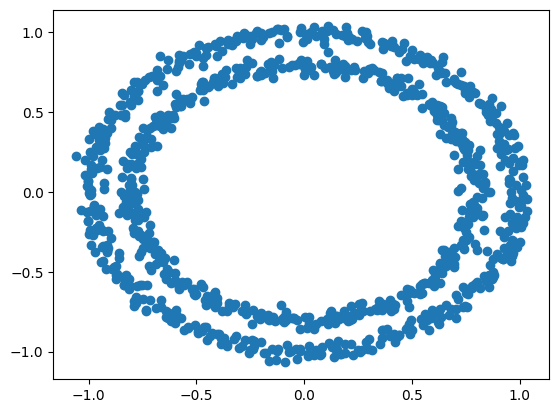

In [4]:
plt.scatter(X[:, 0], X[:, 1])

## Input and Output Shapes

In [5]:
X.shape, y.shape

((1000, 2), (1000,))

In [6]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Model 1



In [7]:
tf.random.set_seed(42)


# Create a Model
circle_classification_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
circle_classification_model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                                    optimizer=tf.keras.optimizers.SGD(),
                                    metrics="accuracy")

# Fit the model
circle_classification_model_1.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 6ms/step - loss: 1.4824 - accuracy: 0.4820
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 0.7312 - accuracy: 0.4920
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7050 - accuracy: 0.4940
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6974 - accuracy: 0.4970
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6954 - accuracy: 0.4910
Epoch 6/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6939 - accuracy: 0.4840
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.5060
Epoch 8/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6942 - accuracy: 0.4840
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6941 - accuracy: 0.4850
Epoch 10/100
32/32 [==============================] - 0s 10ms/step - loss: 0.6938 - accuracy: 0.4910
Epoch 11

In [8]:
circle_classification_model_1.evaluate(X, y)

32/32 [==============================] - 1s 8ms/step - loss: 0.6932 - accuracy: 0.5000


[0.693244993686676, 0.5]

## Model 2

Trying to make model a bit more complex by adding extra hidden layer since it's accuracy is only 50%

In [9]:
tf.random.set_seed(42)


# Create a Model
circle_classification_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile the model
circle_classification_model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                                    optimizer=tf.keras.optimizers.SGD(),
                                    metrics="accuracy")

# Fit the model
circle_classification_model_2.fit(X, y, epochs=100, verbose=0)

In [10]:
circle_classification_model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932715177536011, 0.5]

## Model 3 - Improvement

Common ways to improve the model

1. Adding more hidden layers
2. Increase the number of hidden units
3. Change the activation function
4. Change the optimzation function
5. Change the learning rate
6. Fitting on more data
7. Fitting for longer

In [22]:
tf.random.set_seed(42)


# Create a Model
circle_classification_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
circle_classification_model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                                    optimizer=tf.keras.optimizers.Adam(),
                                    metrics="accuracy")

# Fit the model
circle_classification_model_3.fit(X, y, epochs=100, verbose=0)

In [12]:
circle_classification_model_3.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.7045 - accuracy: 0.5040


[0.7045270800590515, 0.5040000081062317]

### Accuracy is still the same even with 2 hidden units and more neurons added with Adam optimizer. Model isn't learning at all. What's happening? ###

In [13]:
y_preds = circle_classification_model_3.predict(X)

32/32 [==============================] - 0s 2ms/step


In [14]:
def plot_decision_boundary(model, X, y):
  """ Plot decision boundary created by model predicting on X
  """
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  x_in = np.c_[xx.ravel(), yy.ravel()]

  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
    print("Doing multiclass classification")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)

  else:
    print("Doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.xlim(yy.min(), yy.max())


313/313 [==============================] - 1s 2ms/step
Doing binary classification


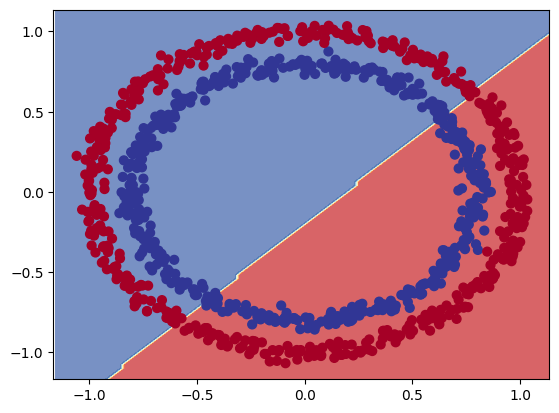

In [15]:
plot_decision_boundary(model=circle_classification_model_3, X=X, y=y)

In [20]:
tf.random.set_seed(42)

X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]

y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

circle_classification_model_3.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100


ValueError: ignored

## Binary classfication model will not work for regression problem.

In [25]:
tf.random.set_seed(42)


# Create a Model
circle_classification_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(1,)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
circle_classification_model_4.compile(loss=tf.keras.losses.mae,
                                    optimizer=tf.keras.optimizers.Adam(),
                                    metrics="mae")

# Fit the model on regression data
circle_classification_model_4.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 3s 14ms/step - loss: 347.9185 - mae: 347.9185
Epoch 2/100
5/5 [==============================] - 0s 11ms/step - loss: 243.5198 - mae: 243.5198
Epoch 3/100
5/5 [==============================] - 0s 9ms/step - loss: 142.0309 - mae: 142.0309
Epoch 4/100
5/5 [==============================] - 0s 11ms/step - loss: 51.0935 - mae: 51.0935
Epoch 5/100
5/5 [==============================] - 0s 11ms/step - loss: 70.9140 - mae: 70.9140
Epoch 6/100
5/5 [==============================] - 0s 8ms/step - loss: 73.9070 - mae: 73.9070
Epoch 7/100
5/5 [==============================] - 0s 6ms/step - loss: 49.2548 - mae: 49.2548
Epoch 8/100
5/5 [==============================] - 0s 8ms/step - loss: 47.6765 - mae: 47.6765
Epoch 9/100
5/5 [==============================] - 0s 8ms/step - loss: 44.5190 - mae: 44.5190
Epoch 10/100
5/5 [==============================] - 0s 13ms/step - loss: 44.1857 - mae: 44.1857
Epoch 11/100
5/5 [==============================

In [26]:
circle_classification_model_4.evaluate(X_reg_test, y_reg_test)

2/2 [==============================] - 0s 11ms/step - loss: 63.3371 - mae: 63.3371


[63.33708190917969, 63.33708190917969]

In [27]:
y_reg_preds = circle_classification_model_4.predict(X_reg_test)

2/2 [==============================] - 0s 14ms/step


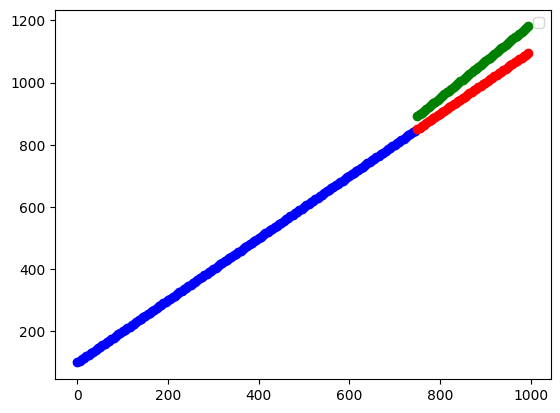

In [30]:
plt.scatter(X_reg_train, y_reg_train, c="b")
plt.scatter(X_reg_test, y_reg_test, c="r")
plt.scatter(X_reg_test, y_reg_preds, c="g")
plt.legend();

## ** Non-Linearity ** ##